# Probability

## Exercice :

Suppose we throw two distinct dice and record the two scores. Answer the questions below

- a) What is the size of the outcome space ? 
6 * 6 = 36 

- b) Let Y be the sum of the scores. Is Y a random variable? If so, express Y  as a function of the outcome space Ω and give the set of possible values.

Y(w) = sum(2 * w)
Y(w) = w1 + w2

- c) Let A be the event that the first score is 1 and B the event that the sum of the scores is 7. List the elements of the events A, A∪B and A∩B.

A = {(1,1),(1,2),(1,3)...(1,6)}
AUB = A + B
AnB = (1,6)

## Independance and conditional probabilities



In [1]:
import random

In [2]:
bag = ['r','r','r','g','g','g','g']
random.randrange(len(bag))
# returns a random value between 0 and 7 (excluding 7)

4

In [3]:
color1 = bag[random.randrange(len(bag))]
color1

'g'

In [9]:
color1 = bag[random.randrange(len(bag))]
color2 = bag[random.randrange(len(bag))]

if color1=='r' and color2=='r':
    print("alls red")#Happen almost never

In [11]:
#Test with replace
bag = ['r','r','r','g','g','g','g']
experiments = 100000
counter = 0
for i in range(experiments):
    color1 = bag[random.randrange(len(bag))]
    color2 = bag[random.randrange(len(bag))]
    if color1=='r' and color2=='r':
        counter += 1
    
counter / experiments

# outputs a value close to the expected value of 3/7 * 3/7, e.g. 0.18367

0.18377

In [12]:
bag.remove(color1) #remove an element of a list
bag.append(color1) #added an element in a list

In [13]:
#Test without replace
bag = ['r','r','r','g','g','g','g']
experiments = 10000
counter = 0
for i in range(experiments):
    color1 = bag[random.randrange(len(bag))]
    # let's remove the marble from the bag
    bag.remove(color1)
    color2 = bag[random.randrange(len(bag))]
    if color1=='r' and color2=='r':
        counter += 1
    # let's put the first marble back for the next experiment!
    bag.append(color1)
    
counter / experiments
# outputs a value close to the expected value of, e.g. 0.1407

0.1484

## Expected values 

In [14]:
import random

outcome_space = ['H','T']
experiments = 10000
tails = 0
for i in range(experiments):
    for toss in range(3):
        result = outcome_space[random.randrange(len(outcome_space))]
        if result=='T':
            tails += 1
    
tails / experiments
# a value very close to 1.5, e.g. 1.501

1.5098

In [15]:
import random

outcome_space = ['H','T']
experiments = 10000
trials = 0
for i in range(experiments):
    seen_heads = False
    while not seen_heads:
        trials += 1
        result = outcome_space[random.randrange(len(outcome_space))]
        if result=='H': 
            break
    
trials / experiments
# a value very close to 2, e.g. 2.0059

2.0218

In [16]:
import random

experiments = 10000
proper_hats = 0
men = list(range(10))
for i in range(experiments):
    hats = list(range(len(men)))
    for man in men:
        hat = hats[random.randrange(len(hats))]
        if man == hat:
            proper_hats += 1
        hats.remove(hat)
        
proper_hats / experiments
# output will be a value close to 1, e.g. 0.9866

0.9982

## Discrete probability distributions

In [17]:
import random

experiments = 10000
experiments_k2 = 0
coinflips = 10
for i in range(experiments):
    heads = 0
    for flip in range(coinflips):
        if random.random() < 0.5:
            heads += 1
    if heads == 2:
        experiments_k2 += 1

experiments_k2 / experiments
# outputs a number close to 0.0439453125, e.g 0.0452

0.0435

Correct! A binomial(n,p) random variable counts the number of successes in n independent trials, where each trial has probability p of success.

## The normal distribution and the central limit theorem

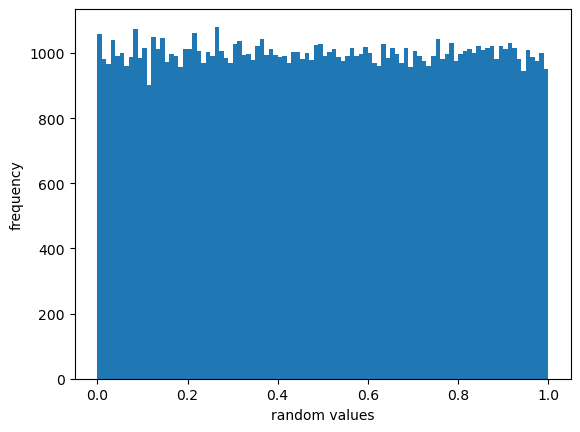

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import random
import numpy as np

# fill a list with 100,000 random numbers between 0 and 1
random_numbers = [random.random() for i in range(100000)] 
# plot to show that numbers are not normally distributed
plt.hist(random_numbers, bins=np.linspace(0, 1, 101))
plt.xlabel('random values')
plt.ylabel('frequency')
plt.show()

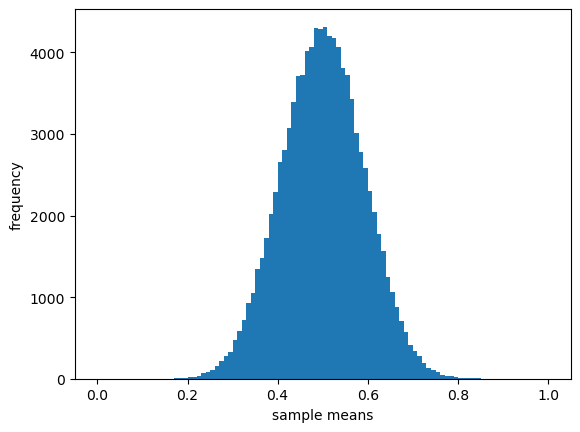

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
import random
import numpy as np

means = []
samplesize = 10
experiments = 100000
for i in range(experiments):
    total = 0
    for ii in range(samplesize):
        total += random.random()
    mean = total / samplesize
    means.append(mean)
plt.hist(means,bins=np.linspace(0,1,101));
plt.xlabel('sample means')
plt.ylabel('frequency')
plt.show()

## Using statistical libraries

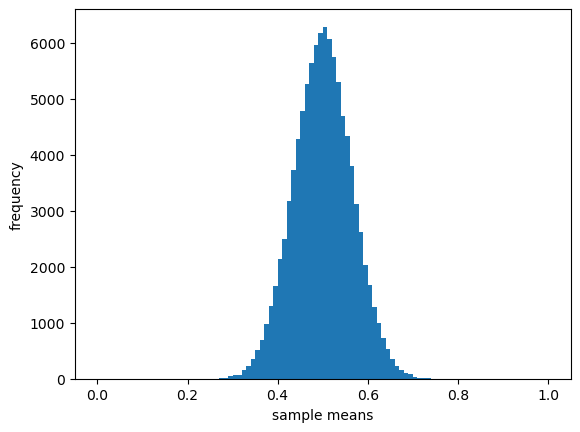

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

sample_means = []
experiments = 100000

for i in range(experiments): # drawing 100000 samples, each with 20 observations

    # drawing 20 observations from uniform(0,1) distribution
    sample = np.random.uniform(0,1,size = 20)  
    # taking the mean, and collecting them
    sample_means.append(np.mean(sample)) 

plt.hist(sample_means,bins=np.linspace(0,1,101));
plt.xlabel('sample means')
plt.ylabel('frequency')
plt.show() #This is as the previous plot 

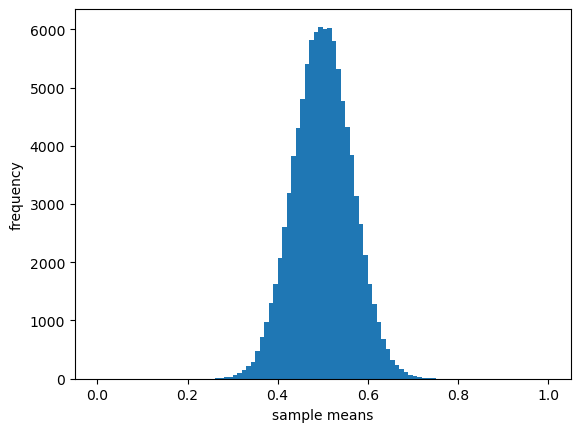

In [8]:
import scipy.stats as stats

# drawing 100000 samples, each with 20 observations from uniform(0,1) distribution 
sample = stats.uniform.rvs(0,1,size = (20,100000)) 
# taking the mean for each sample
sample_means = np.mean(sample,0)

plt.hist(sample_means,bins=np.linspace(0,1,101))
plt.xlabel('sample means')
plt.ylabel('frequency')
plt.show()

### The averagee of a dice roll


In [9]:
uniform_data = stats.uniform.rvs(1,6, size=10000).astype(int)

uniform_data

array([3, 2, 4, ..., 6, 2, 5])

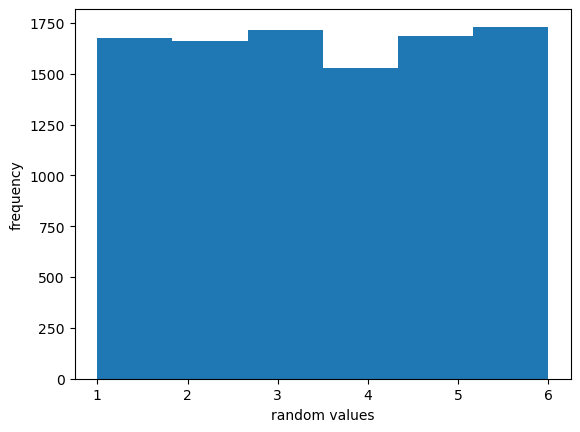

In [10]:
plt.hist(uniform_data, bins=6)
plt.xlabel('random values')
plt.ylabel('frequency')
plt.show()

In [12]:
indexes = np.arange(0, 10000, 5)
print(indexes)

[   0    5   10 ... 9985 9990 9995]


In [13]:
print(len(indexes))

2000


In [14]:
sums = np.add.reduceat(uniform_data, indexes)
print(sums)

[17 14 12 ... 22 13 20]


In [15]:
print(len(sums))

2000


In [16]:
np.mean(sums / 5)

3.5083999999999995

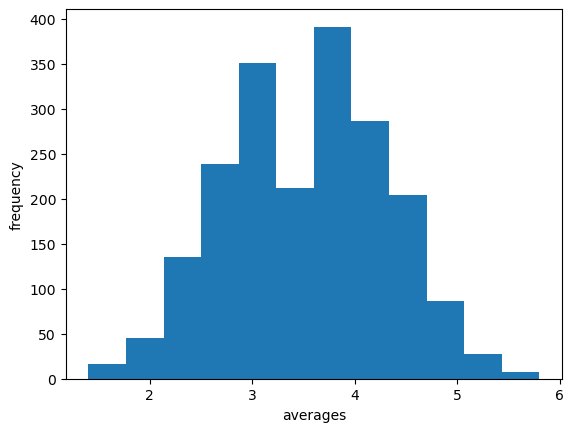

In [17]:
plt.hist(sums / 5, bins=12) 
plt.xlabel('averages')
plt.ylabel('frequency')
plt.show()